In [2]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [4]:
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [5]:
X.shape

(569, 30)

In [6]:
X.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X.dtypes

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

<Axes: >

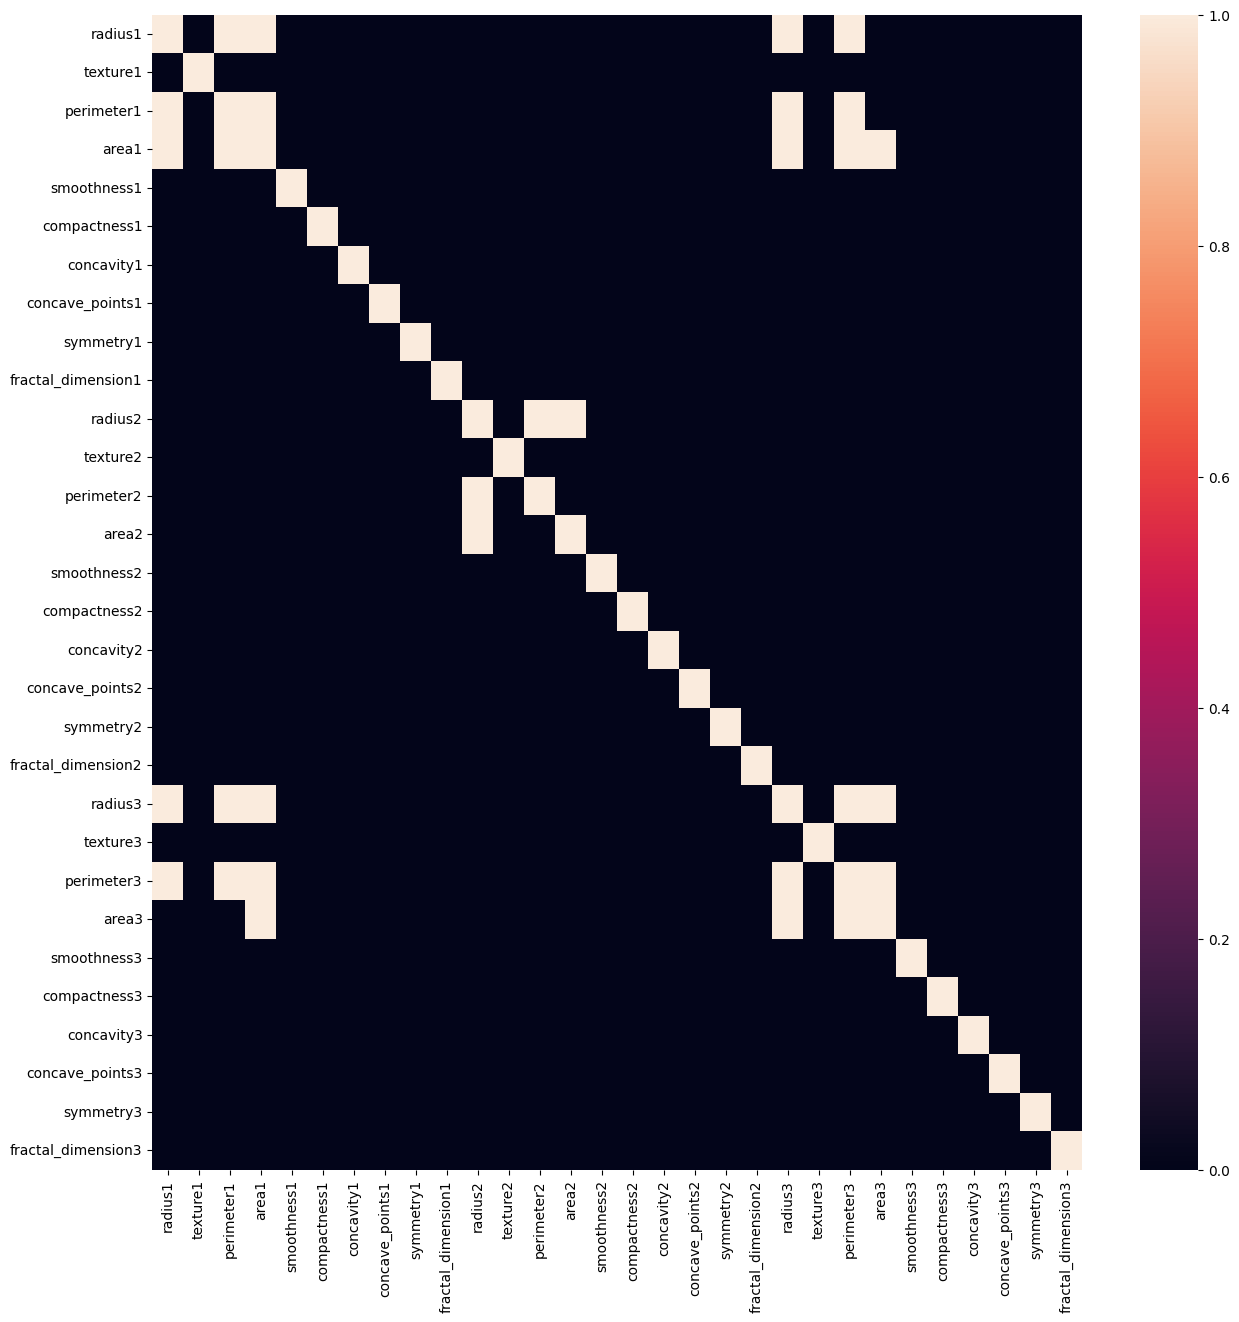

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data=X.corr(method='pearson') > 0.95)

The following have high corrleation : 
- radius1 , perimeter1, area1, radius3, perimeter3, area3

These will be dropped

In [9]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [11]:
X['mean_radius'] = (X['radius1'] + X['radius2'] + X['radius3']) / 3
X['mean_area'] = (X['area1'] + X['area2'] + X['area3']) / 3
X['mean_perimeter'] = (X['perimeter1'] + X['perimeter2'] + X['perimeter3']) / 3

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_66980/1834894286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_radius'] = (X['radius1'] + X['radius2'] + X['radius3']) / 3


In [13]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'mean_radius', 'mean_area',
       'mean_perimeter'],
      dtype='object')

In [14]:
high_corr_columns = ['radius1', 'radius2', 'radius3', 'perimeter1', 'perimeter2', 'perimeter3', 'area1', 'area2', 'area3']
X.drop(columns=high_corr_columns, inplace=True)

In [16]:
numerical_columns = ['texture1', 'smoothness1', 'compactness1', 'concavity1',
       'concave_points1', 'symmetry1', 'fractal_dimension1', 'texture2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'texture3', 'smoothness3',
       'compactness3', 'concavity3', 'concave_points3', 'symmetry3',
       'fractal_dimension3', 'mean_radius', 'mean_area', 'mean_perimeter']

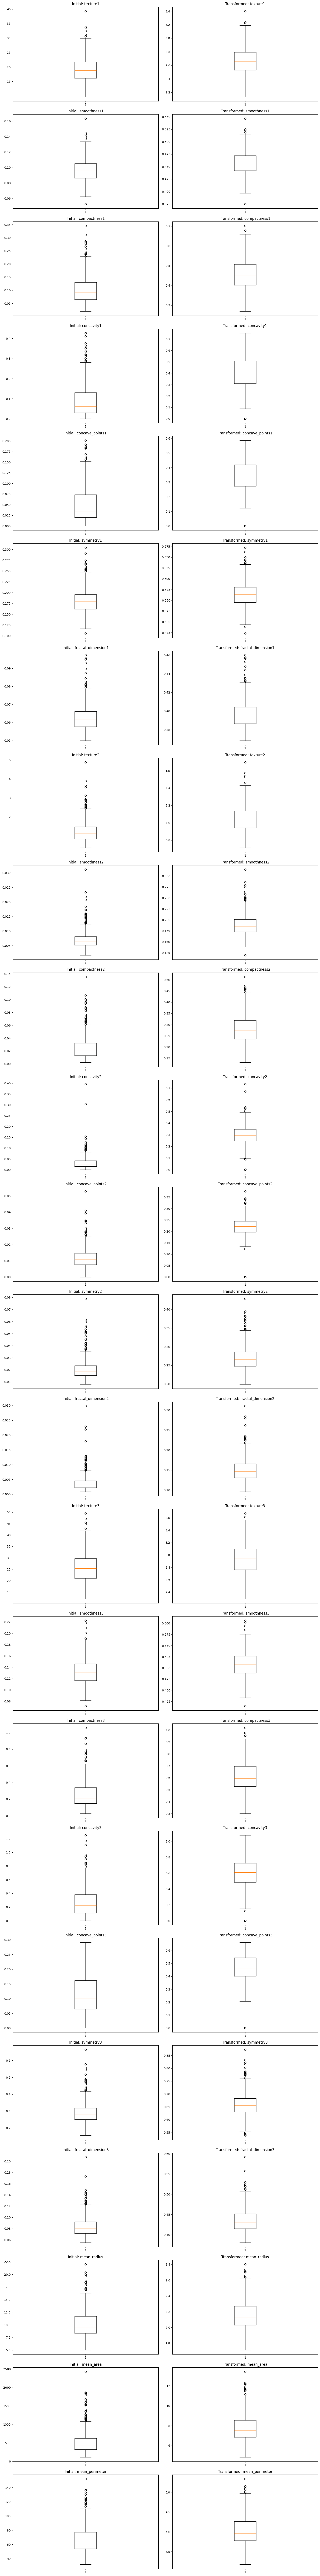

In [17]:

# Determine number of rows dynamically
n_columns = 2
nrows = len(numerical_columns)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=n_columns, figsize=(15, 5 * nrows))

# Generate boxplots
for i, col in enumerate(numerical_columns):
    # Original values
    axes[i, 0].boxplot(X[col].dropna())
    axes[i, 0].set_title(f"Initial: {col}")
    
  
    transformed_values = np.cbrt(X[col])
    axes[i, 1].boxplot(transformed_values)
    axes[i, 1].set_title(f"Transformed: {col}")

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
for col in numerical_columns:
    X[col] = np.cbrt(X[col])
    
    IQR = X[col].quantile(0.75) - X[col].quantile(0.25)

    # Compute bounds
    lower_bound = X[col].quantile(0.25) - 1.5 * IQR
    upper_bound = X[col].quantile(0.75) + 1.5 * IQR

    # Set values outside the bounds to NaN
    X[col] = np.where(
        (X[col] <= lower_bound) | (X[col] >= upper_bound),
        np.nan,
        X[col]
    )

In [23]:
(X.isnull().sum() / X.shape[0])*100

texture1              0.527241
smoothness1           0.878735
compactness1          0.351494
concavity1            2.284710
concave_points1       2.284710
symmetry1             2.108963
fractal_dimension1    2.284710
texture2              0.878735
smoothness2           2.811951
compactness2          1.230228
concavity2            3.690685
concave_points2       3.514938
symmetry2             2.987698
fractal_dimension2    2.636204
texture3              0.351494
smoothness3           0.878735
compactness3          0.878735
concavity3            2.460457
concave_points3       2.284710
symmetry3             3.690685
fractal_dimension3    2.108963
mean_radius           1.581722
mean_area             2.108963
mean_perimeter        1.230228
dtype: float64

Very few values are NaN, so dropping them

In [25]:
X['target'] = np.where(y == 'M', 1, 0)

In [28]:
X.groupby('target').size()  

target
0    315
1    162
dtype: int64

In [27]:
X.dropna(inplace=True)

In [ ]:
y = X['target']
X.drop(columns=['target'], inplace=True)


In [ ]:
def data_preparation(X, y):
    X['mean_radius'] = (X['radius1'] + X['radius2'] + X['radius3']) / 3
    X['mean_area'] = (X['area1'] + X['area2'] + X['area3']) / 3
    X['mean_perimeter'] = (X['perimeter1'] + X['perimeter2'] + X['perimeter3']) / 3
    
    high_corr_columns = ['radius1', 'radius2', 'radius3', 'perimeter1', 'perimeter2', 'perimeter3', 'area1', 'area2', 'area3']
    X.drop(columns=high_corr_columns, inplace=True)
    
    numerical_columns = ['texture1', 'smoothness1', 'compactness1', 'concavity1',
       'concave_points1', 'symmetry1', 'fractal_dimension1', 'texture2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'texture3', 'smoothness3',
       'compactness3', 'concavity3', 'concave_points3', 'symmetry3',
       'fractal_dimension3', 'mean_radius', 'mean_area', 'mean_perimeter']
    
    for col in numerical_columns:
        X[col] = np.cbrt(X[col])
        
        IQR = X[col].quantile(0.75) - X[col].quantile(0.25)

        # Compute bounds
        lower_bound = X[col].quantile(0.25) - 1.5 * IQR
        upper_bound = X[col].quantile(0.75) + 1.5 * IQR

        # Set values outside the bounds to NaN
        X[col] = np.where(
            (X[col] <= lower_bound) | (X[col] >= upper_bound),
            np.nan,
            X[col]
        )
        
        X['target'] = np.where(y == 'M', 1, 0)
        X.dropna(inplace=True)
        y = X['target']
        X.drop(columns=['target'], inplace=True)
    